---
# PHY426 Practical 6/Assignment 3 - Numerical integration with Gaussian Quadrature & Numerical Differentiation
---

This assignment will be due on Monday March 1st at 12pm.

**Total = 98/100**


In [4]:
# Make sure to run this so you can see your plots in the notebook
%matplotlib inline

---
# Question 1: A Diffracted Plane Wave
---


Suppose a plane wave of wavelength λ, such as light or a sound wave, is blocked by an object with a straight edge, represented by the solid line at the bottom of this figure:

![fig from Newman](fig.png)

The wave will be diffracted at the edge and the resulting intensity at the position $(x,z)$ marked by the dot is given by near-field diffraction theory to be

$I = \frac{I_0}{8} \Bigl( \bigl[ 2C(u) + 1 \bigr]^2 +
                        \bigl[ 2S(u) + 1 \bigr]^2 \Bigr),$

where $I_0$ is the intensity of the wave before diffraction and

$u = x \sqrt{2\over\lambda z}\,, \qquad$

$C(u) = \int_0^u \cos {1\over 2}\pi t^2 \>d t, \qquad  $

$S(u) = \int_0^u \sin {1\over 2}\pi t^2 \>d t.$

Write a program to calculate $I\over I_0$ and make a plot of it as a function of $x$ in the range $-5\,$m to $5\,$m for the case of a sound wave with wavelength $\lambda=1\,$m, measured $z=3\,$m past the straight edge. Calculate the integrals using Gaussian quadrature with $N=50$ points.  You should find significant variation in the intensity of the diffracted sound---enough that you could easily hear the effect if sound were
diffracted, say, at the edge of a tall building.

[20 points]


**SR comments**:

19/20

- the plot shows intensity as a function of x, not u (-1)


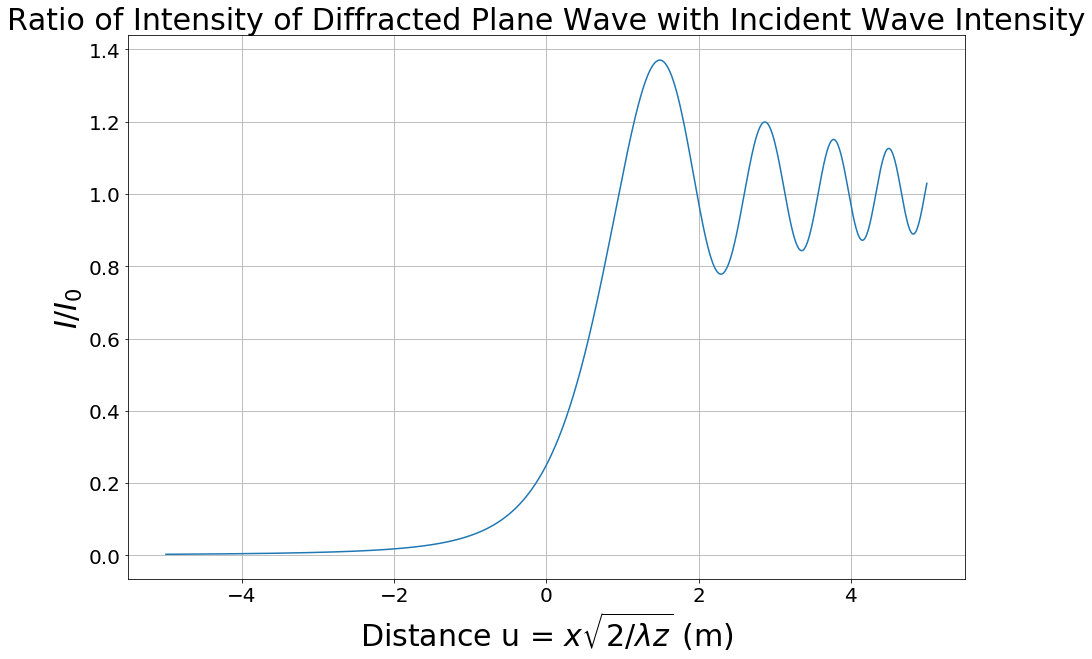

In [5]:
# Write your program (with comments!) here
# Write your program (with comments!) here
import numpy as np
import matplotlib.pyplot as plt
from pylab import *


# Defining the constants for the wavelength, the value for z, and the number of points
# to be used for the Gaussian quadrature
wavelength = 1
z = 3
N = 50


# Gaussian Quadrature functions from lecture 5
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Calculate the sample points (roots of the Legendre polynomial) using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

# Defines the variable u as a function of x and y
def u(x, z):
    return x*np.sqrt(2/(wavelength*z))


# Integral C(u) as given in problem description
def C(u):
    '''
    input: function u
    output: float
    '''
    
    # Defining the integrand of the integral for C(u)
    f = lambda t: np.cos((0.5)*np.pi*(t**2))
    
    # Set up arrays tp and wp with gaussxwab for size N
    # where a = 0 and b = u(x,z)
    tp,wp = gaussxwab(N, 0.0, u)
    
    # Set up integral C
    C = 0.0
    
    # For each tp[k] and wp[k], add wp[k]*f(tp[k])
    # to the integral C
    for k in range(N):
        C += wp[k]*f(tp[k])
    
    # Return the result of the integration
    return C
    
# Integral S(u) as given in problem description
def S(u):
    '''
    input: function u
    output: float
    '''
    
    # Defining the integrand of the integral for C(u)
    f = lambda t: np.sin((0.5)*np.pi*(t**2))
    # Set up arrays tp and wp with gaussxwab for size N
    # where a = 0 and b = u(x,z)
    tp,wp = gaussxwab(N, 0.0, u)
    
    # Set up integral S
    S = 0.0
    
    # For each tp[k] and wp[k], add wp[k]*f(tp[k])
    # to the integral S
    for k in range(N):
        S += wp[k]*f(tp[k])
    
    # Return the result of the integration
    return S


# Define our range of x values from -5m to 5m with 1000 points
# and set up the array for the intensity, I, with the same number
# of points.
x = np.linspace(-5.0, 5.0, 1000)
I = np.zeros(1000)

# Looping over 1000 values, we calculate the ith element of the 
# array I, using the formula from the description with help from the
# user-defined functions C((u(x,z)) and S(u(x,z)) where u(x, z) = u(x[i], z)
for i in range(1000):
    I[i] = (1.0/8.0)*(((2.0 * C(u(x[i],z))) + 1)**2 + ((2.0 * S(u(x[i],z))) + 1)**2)


# Define the figure and axes objects with size 15x10
fig, ax = plt.subplots(figsize=(15.0,10.0))

# Title for the plot, x and y axis labels
plt.title("Ratio of Intensity of Diffracted Plane Wave with Incident Wave Intensity", fontsize=30)
plt.xlabel('Distance u = ' + r'$x \sqrt{2 /\lambda z} $' + ' (m)', fontsize=30)
plt.ylabel(r'$ I / I_0$', fontsize=30) 

# Plotting graph and displaying grid 
plt.plot(x,I)
plt.grid()

# Increasing size of x and y ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

---
# Question 2: Diffraction Gratings
---

Light with wavelength $\lambda$ is incident on a diffraction grating of total width $w$, gets diffracted, is focused with a lens of focal length $f$, and falls on a screen:

![fig from Newman](FIG1.png)

Theory tells us that the intensity of the diffraction pattern on the screen, a distance $x$ from the central axis of the system, is given by
 
$I(x) = \biggl| \int_{-w/2}^{w/2} \sqrt{q(u)}\>
                e^{i 2\pi xu/\lambda f} \> d u \biggr|^2,$
 
where $q(u)$ is the intensity transmission function of the diffraction grating at a distance $u$ from the central axis, i.e., the fraction of the incident light that the grating lets through.

(a) Consider a grating with transmission function $q(u) = \sin^2 \alpha u$.  What is the separation of the "slits" in this grating, expressed in terms of  $\alpha$? [Write your answer in the markdown box below.]



Put your answer to part (a) in this cell here.

In [6]:
#####################################################################################
# a)
#####################################################################################

# The slits occur when the transmission function reaches a peak, by taking 
# derivative of q(u) and equating to zero we reach the condition that the
# slit spacing is related to alpha by: slit spacing = nπ/α for integers n.
# Thus the absolute slit spacing is given by:
# π/α

(b) Write a Python function `q(u)` that returns the transmission function $q(u) = \sin^2 \alpha u$ as above at position $u$ for a grating whose slits have separation $20\,\mu$m.

(c) Use your function in a program to calculate and graph the intensity of the diffraction pattern produced by such a grating having ten slits in total, if the incident light has wavelength $\lambda=500\,$nm.  Assume the lens has a focal length of 1 meter and the screen is $10$ cm wide. You can use whatever method you think appropriate for doing the integral. Once you've made your choice you'll also need to decide the number of sample points you'll use.  What criteria play into this decision?

**Hint**: Notice that the integrand in the equation for $I(x)$ is complex, so you
  will have to use complex variables in your program.  There is a version of the `math` package for use with
  complex variables called `cmath`.  In particular you may find the
  `exp` function from `cmath` useful because it can calculate the
  exponentials of complex arguments. 
  
Create a visualization of how the diffraction pattern would look on the screen using a density plot.  Your plot should look something like this: 

![fig from Newman](FIG2.png)

[20 points]

**SR comments**
20/20

[]

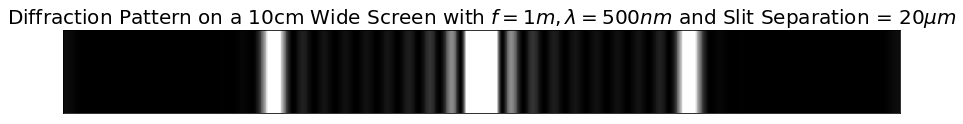

In [7]:
# Write your program (with comments!) here
import cmath
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

#####################################################################################
# b)
#####################################################################################

# Slit spacing of the diffraction grating in micrometres 
separation = 20e-06

def q(u):
    '''
    input: float
    output: float
    
    returns the transmission function q(u) = sin^2(αu) for a float u. Where alpha
    is related to the slit spacing by the formula in a)
    '''
    
    # The slit spacing is related to the constant alpha by:
    # π/α = spacing, thus rearraging for α we have: α = π/spacing
    alpha = np.pi/separation
    
    # Returns the function q using the alpha calculated for the 
    # given value of u
    return (np.sin(alpha*u))**2


#####################################################################################
# c)
#####################################################################################

# Due to the periodic nature of the function I and because it varies rapidly with x,
# Gaussian Quadrature is not fit for the calculation for the integral. Instead, 
# Simpson's rule will be used instead.

# Define all physical constants for the problem:
# w - width of grid from central axis to edge
# f - focal length 
# wavelength - wavelength
# N - number of points within the integration
w = 5.0*separation
f = 1.0
wavelength = 500e-9
N = 500

# Array representing the screen of length 10cm -> 0.1m
# or a screen from -0.05m to 0.05m with 1000 points
x = np.linspace(-0.05, 0.05, 1000)

# Set up our array for the intensity with 1000 points
I = np.zeros((100, 1000))

# Looping over all values of x
for i in range(1000):
    
    u, h = np.linspace(-5.0*separation, 5.0*separation, N, retstep=True)
    
    # Initiate our integral
    integral = 0
    
    # Add contribution from exterior points
    integral+= np.sqrt(q(u[0])) * cmath.exp(((0.0+1.0j)*2*cmath.pi*x[i]*u[0])/(wavelength*f))
    integral+= np.sqrt(q(u[-1]))* cmath.exp(((0.0+1.0j)*2*cmath.pi*x[i]*u[-1])/(wavelength*f))

    # Add up interior points according to Simpson's rule where the function used is 
    # the integrand of I(x). 
    for k in range(1, N-1):
        
        if k%2 == 0:
            integral+= 2.0 * np.sqrt(q(u[k]))*cmath.exp(((0.0+1.0j)*2*cmath.pi*x[i]*u[k])/(wavelength*f))
        else:
            integral+= 4.0 * np.sqrt(q(u[k]))*cmath.exp(((0.0+1.0j)*2*cmath.pi*x[i]*u[k])/(wavelength*f))

    integral = abs(integral)
    I[:,i] = integral**2


# Setting up our figure and axes and plotting our diffraction pattern
# using .imshow()
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(I, cmap='binary_r',vmax = 80000)
plt.title("Diffraction Pattern on a 10cm Wide Screen with "+ r'$f = 1m, \lambda = 500nm$'+ ' and Slit Separation = ' \
                                                                r'$20\mu m$', fontsize =20)

# Getting rid of x and y ticks
ax.set_yticks([])
ax.set_xticks([])

---
# Question 3: The Stefan-Boltzmann Constant
---

The Planck theory of thermal radiation tells us that in the (angular) frequency interval $\omega$ to $\omega+ d \omega$, a black body of unit area radiates electromagnetically an amount of thermal energy per
second equal to $I(\omega)\> d \omega$, where

  $I(\omega) = {\hbar\over4\pi^2c^2}\,{\omega^3\over( e^{\hbar\omega/k_BT}-1)}.$

Here $\hbar$ is Planck's constant over $2\pi$, $c$ is the speed of light, and $k_B$ is Boltzmann's constant.

(a) Show that the total energy per unit area radiated by a black body is

$W = {k_B^4 T^4\over4\pi^2c^2\hbar^3} \int_0^\infty {x^3\over e^x-1}\>d x.$

**Hint**: Refer to section 5.8 of Newman's book and use a change of variables. 

You can write your solution in a Markdown box using LateX, or you can upload your answer to the Jupyterhub as a file (e.g. scanning in your answer). 

(b) Write a program to evaluate the integral in this expression. 

(c) Even before Planck gave his theory of thermal radiation around the turn of the 20th century, it was known that the total energy $W$ given off by a black body per unit area per second followed Stefan's law: $W = \sigma T^4$, where $\sigma$ is the Stefan-Boltzmann constant. Use your value for the integral above to compute a value for the Stefan- Boltzmann constant (in SI units) to three significant figures. Check your result against the known value, which you can find in books or on-line.  You should get good agreement.

[20 points]

**SR comments**:
- comparison to known value relies on the user to make the comparison -- better to give ther % error (-1)

19/20

Answer to question a)

Given $I(\omega)$ from above, the total energy per unit area is given by:

$W = {\hbar\over4\pi^2c^2} \int_0^\infty {\omega^3\over e^{\hbar\omega/k_BT}-1}\>d \omega.$


Let us define x as: 

$x = {\hbar\omega\over k_BT}$

Rearranging for ${\omega}:$
          
${\omega}$ =  ${k_BT\over \hbar}x$ $   {\Rightarrow}   $ $   {d\omega}$ =  ${k_BT\over \hbar} dx   $

Thus ${\omega^3}$ = ${k_B^3T^3\over \hbar^3} x^3$

Inserting this into our integral gives us:


$W = \int_0^\infty ({\hbar\over4\pi^2c^2}) {({k_B^3T^3\over \hbar^3}x^3)\over e^{x}-1}\> ({k_BT\over \hbar}) d x.$

$ \Rightarrow W = \int_0^\infty ({\hbar\over4\pi^2c^2})({k_B^3T^3\over \hbar^3})({k_BT\over \hbar}) {{x^3}\over e^{x}-1}\> d x.$


$ \Rightarrow W = {\hbar\over4\pi^2c^2}{k_B^3T^3\over \hbar^3}{k_BT\over \hbar} \int_0^\infty {x^3\over e^{x}-1}\> d x.$

Giving us:

$W = {k_B^4T^4 \over 4\pi^2c^2\hbar^3} \int_0^\infty {x^3\over e^{x}-1}\> d x.$

which is what we wanted to prove

In [10]:
# Write your program (with comments!) here
import numpy as np
import scipy.constants as constants
import matplotlib.pyplot as plt
from pylab import *
import math

#####################################################################################
# b)
#####################################################################################

# We want to evaluate the integral from 0 to +infinity of x^3/(e^x -1) with 
# respect to x. Upon looking at the graph of the integrand, we see that it
# does not vary much with x, thus the integral is a good candidate for 
# gaussian quadrature which we'll use in this computation

# In order to evaluate the integral to infinity, we make a substitution for x
# with x = z/(1-z) so that the same integral can be evaluated for 0 <= z <= 1

def integrand(z):
    '''
    input: float
    output:float
    
    The integrand of the integral in W.
    '''
    
    return (z**3/(1.0-z)**3)/(np.exp(z/(1.0-z)) - 1.0)


# Gaussian Quadrature functions from lecture 5
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Calculate the sample points (roots of the Legendre polynomial) using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w


# Creating an array zp of N sample points between 0 and 1 where the sample 
# points are calculated by gaussxwab along with their weights wp. We use 50
# points. The argument for the integrand in substituted by z/(1-z) and 
# multiplied by 1/(1-z)^2 which describes the same original integration but 
# with bounds 0 to 1
N = 50
a = 0.0
b = 1.0
zp, wp = gaussxwab(N, a, b)


# Perform the integration using the integrand function defined above and 
# multiply by 1/(1-z)^2
W = 0.0
for k in range(N):
    W += wp[k]*(1.0/(1.0 - zp[k])**2)*integrand(zp[k])

    
#####################################################################################
# c)
#####################################################################################

# Calculating the Stefan-Boltzmann constant by multiplying the integral calculated in
# b) with the constant k^3/(4*pi^2*c^2*hbar^3)
W = (constants.k**4)/(4*(np.pi**2)*(constants.c**2)*(constants.hbar)**3 )*W


print("Scipy Value of Stefan-Boltzmann Constant: ",constants.Stefan_Boltzmann)
print(r'$W\over m^2K^4$')

# Rounding to 3sf requires using round() for 8+3 digits since the true value is to the
# order of 10e-8

print("Calculated Stefan-Boltzmann Constant: ", W)
print("Calculated Stefan-Boltzmann Constant rounded to 3 sf: ",round(W, 8+3))

Scipy Value of Stefan-Boltzmann Constant:  5.670374419e-08 $W\over m^2K^4$
Calculated Stefan-Boltzmann Constant:  5.670374417654657e-08
Calculated Stefan-Boltzmann Constant rounded to 3 sf:  5.67e-08


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp


# Numerical derivatives

* Simpler than numerical integration, in  a way.
* Based on Taylor series approximations.
* Use Taylor series approximations to estimate errors.


1. Forward difference approximation: $\displaystyle f'(x) \approx \frac{f(x+h) - f(x)}{h}$,
2. Backward difference approximation: $\displaystyle f'(x) \approx \frac{f(x) - f(x-h)}{h}$,

## Basic philosophy for error estimation

Use Taylor series to find error in these approximations:
$$ f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + h.o.t.$$
Isolate for $f'(x)$:
$$f'(x) = \frac{f(x+h) - f(x)}{h} - \frac{h}2 f''(x) + h.o.t.$$
$\Rightarrow$ error is 1st-order in $h$ (the same is true for backward difference method).

## Central differences

* Using Taylor series to find sneaky improvements to finite difference (FD) schemes.
* Example: central FD method:
$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}.$$
* Notice it still only involves subtracting 2 points, it's just that the location of the 2 points is different.
* We are approximating the value of the derivative using the values of $f(x)$ at a distance $2h$ apart

* Error:
$$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac{h^3}{6}f'''(x) + h.o.t.$$
$$f(x-h) = f(x) - hf'(x) + \frac{h^2}{2}f''(x) - \frac{h^3}{6}f'''(x) + h.o.t.$$

* Substract:
$$ f(x+h) - f(x+h) = 2hf'(x) + \frac{h^3}{3}f'''(x) + h.o.t.$$
* Isolate for $f'(x)$ and add:
$$f'(x) = \frac{f(x+h) - f(x-h)}{2h} - \boxed{\frac{h^2}{3}f'''(x)} + h.o.t.$$

* So we see that this formula is accurate to 2nd order in $h$.
* Can get higher order methods by including more points (see table 5.1 on page 196).

## Roundoff error, a comeback

* Let’s take another look at this formula:
$$f(x+h) = f(x) + hf'(x) + \frac{h^2}{2}f''(x) + h.o.t.$$
* What happens when we consider roundoff error? Remember, we learned that substracting numbers that are close is dangerous!
* We saw that the computer can typically calculate a number such as f(x) to an accuracy of $Cf(x)$, where the value of the error constant C can vary but is typically about $C = 10^{−16}$ in Python
* Each of the terms $f(x+h)$ and $f(x)$ have error $\sim C|f(x)|$. Their difference will have approximate error $2Cf(x)$ ("worst case" error).
* So in fact there are two sources of error and this leads to (eqn. (5.91) in book):
$$\epsilon = \underbrace{\frac{2C|f(x)|}{h}}_{\text{round-off error}} + \underbrace{\frac{1}{2}h |f''(x)| + h.o.t.}_{\text{approximation error}}$$

* Factor $1/h \Rightarrow$ increasing $N$ could increase the error.
* The error has a minimum when $h$ satisfies
$$h = \sqrt{4C\left|\frac{f(x)}{f''(x)}\right|} \qquad (5.93).$$
(*Note: $x$ is not a variable in this discussion. $f(x)$ should be interpreted as the typical magnitude of $f$.*)
* Example: $f(x), f''(x) = O(1) \Rightarrow h\sim O(\sqrt{C}) = O(10^{-8})$. In this case, the error is $\epsilon = O(10^{-8})$, from
$$\epsilon = h|f''(x)| = \sqrt{4C \left|f(x)f''(x)\right|} \qquad (5.94).$$
* There are two points: there's a limit to the improvement you can obtain by going to finer resolution, and the precision expected on differentiation is orders of magnitude less than that of other operations we have discussed.

---
# Question 4: Image Processing and the STM
---

see pdf in your Jupyterhub folder for the text and the txt files for the data.

--> complete parts a & b.

[40 points]

**SR comments**
40/40

(array([-300., -200., -100.,    0.,  100.,  200.,  300.]),
 <a list of 7 Text yticklabel objects>)

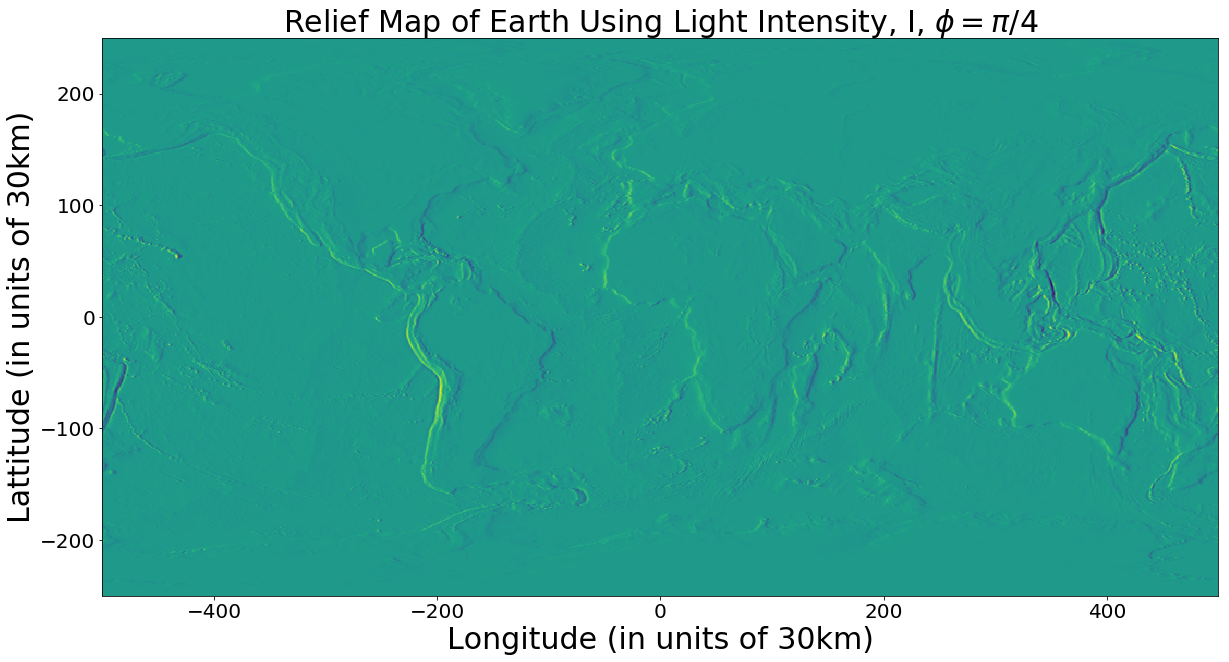

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Reading in our input from the file altitude.txt
altitude = np.loadtxt('altitude.txt')

# Set our distance interval of 30km and our angle phi
# of the incoming light
h = 30000
phi = np.pi/2.0

#####################################################################################
# a)
#####################################################################################

# Idea: we use central differences for interior points, forward difference for 
# altitudes with x coordinate x[0] and backward difference for x coordinate of 
# x[-1] to calculate dw/dx. We calculate dw/dy by analogous procedure in the 
# y coordinates

# First we start by setting up our arrays for the partial derivatives which 
# should have the same amount of points, and shape as the original data
dw_dx = np.zeros(altitude.shape)
dw_dy = np.zeros(altitude.shape)

# We loop over the number of x-values in the array, given by altitude.shape[0]
for i in range(altitude.shape[0]):
    
    # Looping over y-values in the array, given by altitude.shape[1]
    for j in range(altitude.shape[1]):
        
        # Separating the calculation of dw_dx and dw_dy, the first block calculates the
        # partial derivative dw_dy and the second part dw_dx
        
        # We start by checking if we are in an edge case, j = 0 or j = altitude.shape[1] - 1
        # If j = 0, then we use forward difference method to calculate the partial derivative
        # with respect to y
        if j == 0:
            dw_dy[i,j] = (altitude[i,j+1] - altitude[i,j])/h
        
        # If j = altitude.shape[1] - 1 (1024 - 1 = 1023) in this case, then we use backward 
        # difference method to calculate the partial derivative
        elif j == altitude.shape[1] - 1:
            dw_dy[i,j] = (altitude[i,j] - altitude[i,j-1])/h
        
        # In the last case where j is an interior point, we use the central difference
        else:
            dw_dy[i,j] = (altitude[i,j+1] - altitude[i,j-1])/(2*h)
            
        # Now calculating the partial derivative dw_dx
        # If i == 0, we use the forward difference to calculate dw_dx
        if i == 0:
            dw_dx[i,j] = (altitude[i+1,j] - altitude[i,j])/h
        
        # If i = altitude.shape[1] - 1 (512 - 1 = 511) then we use backward difference
        elif i == (altitude.shape[0] - 1):
            dw_dx[i,j] = (altitude[i,j] - altitude[i-1,j])/h
            
        # Otherwise i is an interior point and we use central difference
        else:
            dw_dx[i,j] = (altitude[i+1,j] - altitude[i-1,j])/(2*h)
            
#####################################################################################
# b)
#####################################################################################

# Set up our array for the values for I
I = np.zeros(altitude.shape)

# Calculating the light intensity using the formula given in the statement of the
# problem, using the partial derivative dw_dx and dw_dy, and phi 
I = (np.cos(phi)*(dw_dx) + np.sin(phi)*(dw_dy))/np.sqrt((dw_dx)**2 + (dw_dy)**2 +1)

# Creating figure and axes objects and setting size of figure 
fig, ax = plt.subplots(figsize=(20,20))

# Displaying image using imshow using the light intensity map of I
im = ax.imshow(I, extent = [-500,500,-250,250], cmap='viridis')

# Setting image title and x and y labels
plt.title("Relief Map of Earth Using Light Intensity, I, "+ r'$\phi = \pi/4 $', fontsize =30)
plt.xlabel("Longitude (in units of 30km)", fontsize =30)
plt.ylabel("Lattitude (in units of 30km)", fontsize =30)

# Increasing size of x and y ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)